# Análisis de los Lanzamientos de los Cy Young

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
matplotlib inline

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual,Button, HBox, VBox
import ipywidgets as widgets


### Lectura de archivo de datos (crudos) y filtrado

In [19]:
#carga de archivo: 
#dd = pd.read_csv('ClaytonKershaw2020.csv')
#dd = pd.read_csv('ShaneBeaber.csv')
dd = pd.read_csv('TreborBauer.csv')


#ajuste a formato válido de formato de fecha
dd['game_date'] = dd['game_date'].astype('datetime64[ns]')
#dd.info()

# clean data
dd_clean=dd.drop(dd[dd['pitch_type'].isna()].index)
print('data antes del clean', dd.shape[0]) 
print('data despues del clean', dd_clean.shape[0])


data antes del clean 1165
data despues del clean 1165


## Distribución de los Lanzamientos

<AxesSubplot:title={'center':'Distribución por Tipo de Resultado'}, ylabel='type'>

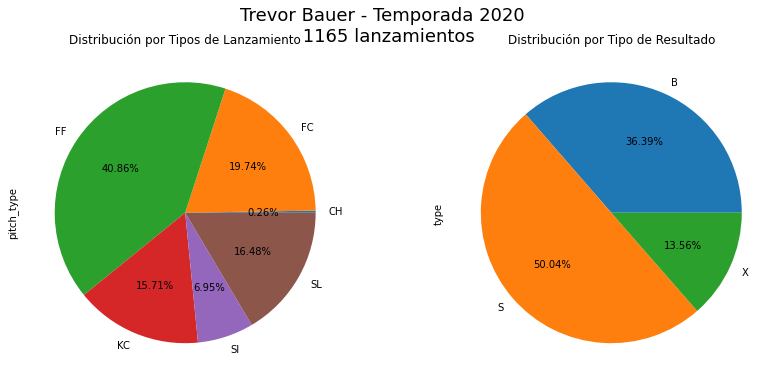

In [20]:
fig0, axes0 = plt.subplots(1,2,figsize=(14, 6))
fig0.suptitle( '{} - Temporada 2020 \n {:d} lanzamientos'. format( dd_clean.player_name[0], dd_clean.groupby('type')['type'].count().sum() ),fontsize=18)

dd_clean.groupby('pitch_type')['pitch_type'].count().plot.pie(title='Distribución por Tipos de Lanzamiento',
                                                    ax=axes0[0],autopct='%1.2f%%')

dd_clean.groupby('type')['type'].count().plot.pie(title='Distribución por Tipo de Resultado', ax=axes0[1],autopct='%1.2f%%')


## Distribución de Velocidades por Tipo de Lanzamiento

In [1]:
#indexado por fecha de los juegos
index_games= dd_clean.groupby(dd_clean['game_date']).sum().index

#definición de columnas de interés
tipos_lanzamientos = dd_clean.groupby('pitch_type')['pitch_type'].count().index #CU, FF, SL, etc
tipos_eventos = dd_clean.groupby('events')['events'].count().index        # Anotación Oficial: Single, Double, walk, K, etc
tipos_batazos = dd_clean.groupby('bb_type')['bb_type'].count().index      # fly_ball, ground_ball, etc


NameError: name 'dd_clean' is not defined

Text(0.5, 1.0, 'Spray Chart')

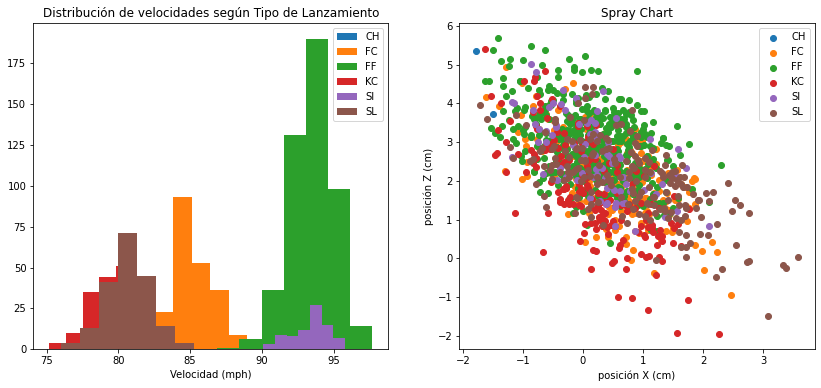

In [21]:
fig, axs = plt.subplots(1,2,figsize=(14, 6))

for tipo in tipos_lanzamientos:
    axs[0].hist(dd_clean[dd_clean['pitch_type']==tipo].release_speed,7, label=tipo)
    axs[1].scatter(dd_clean[dd_clean['pitch_type']==tipo].plate_x,dd_clean[dd_clean['pitch_type']==tipo].plate_z, label=tipo)

axs[0].legend()
axs[0].set_xlabel('Velocidad (mph)')
axs[0].set_title('Distribución de velocidades según Tipo de Lanzamiento')

axs[1].legend()
axs[1].set_xlabel('posición X (cm)')
axs[1].set_ylabel('posición Z (cm)')
axs[1].set_title('Spray Chart')

## Análisis de los Lanzamientos conectados por los bateadores

Text(0.5, 1.0, 'Tipo de Coenxión \n por Tipo de Lanzamiento')

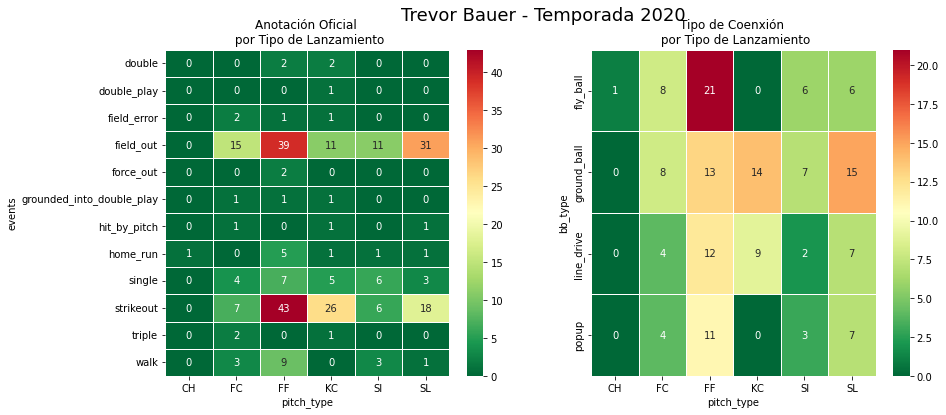

In [22]:

# Anotación Oficial (eventos) por Tipo de Lanzamiento
dm = pd.DataFrame(columns=tipos_lanzamientos,index=tipos_eventos)
for tl in tipos_lanzamientos:
    g=dd_clean[dd_clean['pitch_type']==tl]
    for te in tipos_eventos:
        dm.loc[te,tl]=float(g[g['events']==te].shape[0])
dm = dm.apply(pd.to_numeric)

# Tipo de conexión (o batazo) por Tipo de Lanzamiento
df = pd.DataFrame(columns=tipos_lanzamientos,index=tipos_batazos)
for tl in tipos_lanzamientos:
    d=dd_clean[dd_clean['pitch_type']==tl]
    for tb in tipos_batazos:
        df.loc[tb,tl]=float(d[d['bb_type']==tb].shape[0])
df = df.apply(pd.to_numeric)

# Graficas de los data frames dm y df
fig1, axes1 = plt.subplots(1,2,figsize=(14, 6))
fig1.suptitle('{} - Temporada 2020'. format(dd_clean.player_name[0]), fontsize=18)

sns.heatmap(dm,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=axes1[0])
sns.heatmap(df,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=axes1[1])

axes1[0].set_title('Anotación Oficial \n por Tipo de Lanzamiento')
axes1[1].set_title('Tipo de Coenxión \n por Tipo de Lanzamiento')

## Un widget para interactuar con los:
## 1. tipos de batazos recibidos, 2. tipos de resultados y  3. Anotación oficial 

In [23]:

#ww = interact_manual(
#    tipoLanzamiento = list(tipos_lanzamientos.values), TB = list(tipos_batazos.values) 
#)


@widgets.interact_manual(tipoLanzamiento = list(tipos_lanzamientos.values), TB = list(tipos_batazos.values) )

def pieResult(tipoLanzamiento='SL',TB ='fly_ball'):

#def pieResult(changue):
    
    fig2, axes2 = plt.subplots(1,2,figsize=(14, 6))
    fig2.suptitle('{} - Temporada 2020'. format(dd_clean.player_name[0]), fontsize=18)
    
    
    sns.heatmap(df,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=axes2[0])
    
    #tipoLanzamiento = vals[0].value
    #TB = vals[1].value
    
    dm = dd_clean[(dd_clean['pitch_type']==tipoLanzamiento) & (dd_clean['bb_type']==TB)]
    dm.groupby('events')['events'].count().plot.pie(title='titulo',
                                                    ax=axes2[1],autopct='%1.2f%%')
    
    axes2[0].set_title('Lanzamientos conectados por bateadores: {:d}'. format(int( df.sum().sum()) ) )
    axes2[1].set_title('Distribución (por Anotación Oficial) de los {:d} {} que resultaron en {}'. format( int( df.loc[TB,tipoLanzamiento]), tipoLanzamiento, TB ) )
    

interactive(children=(Dropdown(description='tipoLanzamiento', index=5, options=('CH', 'FC', 'FF', 'KC', 'SI', …